<a href="https://colab.research.google.com/github/Midhilesh4890/Natural-Language-processing/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import gensim.downloader as gs
word2vec = gs.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [12]:
len(word2vec.vocab)

3000000

In [17]:
word2vec.similar_by_word('tiger',topn=5)

[('tigers', 0.8028031587600708),
 ('elephant', 0.6681442856788635),
 ('rhino', 0.6406095027923584),
 ('elephants', 0.6400991678237915),
 ('panther', 0.6312947273254395)]

In [19]:
word2vec.most_similar('tiger',topn=5)

[('tigers', 0.8028031587600708),
 ('elephant', 0.6681442856788635),
 ('rhino', 0.6406095027923584),
 ('elephants', 0.6400991678237915),
 ('panther', 0.6312947273254395)]

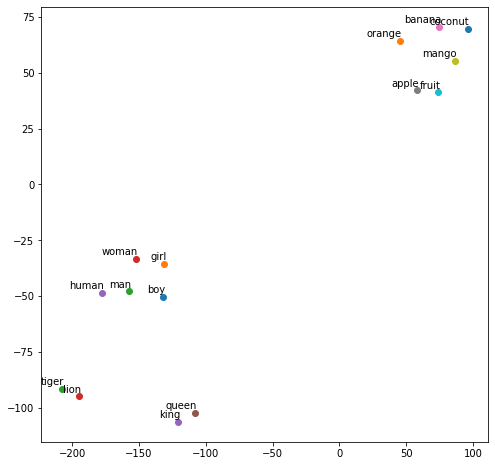

In [22]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange",'tiger','lion','human']

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec)